<hr style="border:2px solid gray"> </hr>
<center>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />
</center>
    
<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 7 - Classification Using Convolutional Neural Networks</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**The objective of this assignment is to familiarize you with building and training Convolutional Neural Networks (CNNs) using TensorFlow/Keras on real-world image datasets. You will implement a CNN model to perform image classification on the CIFAR-10 dataset.**



**Guidelines**
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections.

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 7 - Classification Using Convolutional Neural Networks (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook.

<div class="alert alert-block alert-info">

# Part 1: Activity

</div>

In this part you are asked to implement a CNN model to perform image classification on the CIFAR-10 dataset.

**Dataset Description:**
- `CIFAR-10` is a benchmark dataset consisting of $60,000$ $32x32$ color images in $10$ classes.
- Each class contains $6,000$ images.
- The dataset is split into $50,000$ training images and $10,000$ test images.

# Question 1: Classification Using CNN
<hr style="border:1px solid orange"> </hr>

#### Q 1.1: In the following cell, complete the code to read and preprocess the images by scaling pixel values to the range [0, 1]

In [111]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

**Load train and test data from the CIFAR10 dataset**

In [112]:
# Step 2: Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

**Explore the shape of the trainning image**

In [113]:
print(train_images.shape)

(50000, 32, 32, 3)


**Visualizing sample of the trainning images from the dataset**

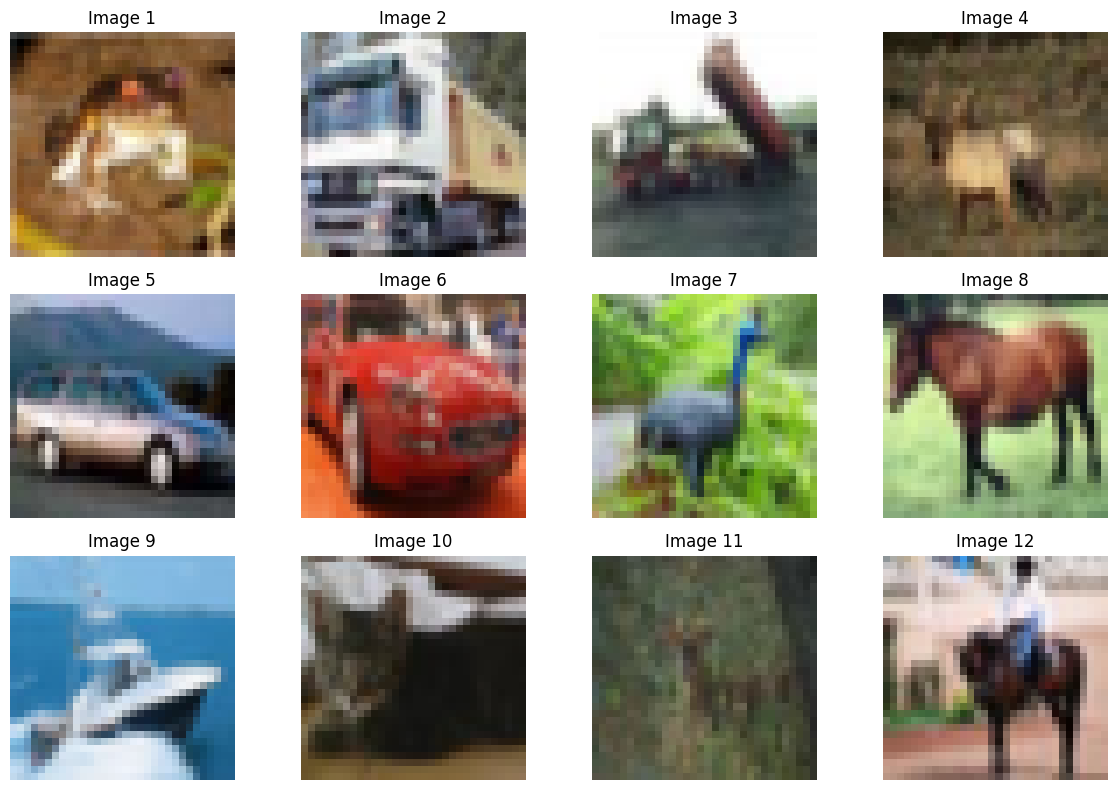

In [114]:
from matplotlib import pyplot as plt

# Display 12 sample training images
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')
    ax.set_title(f"Image {i+1}")
plt.tight_layout()
plt.show()

**Reshaping the images with data type conversion:**

In [115]:
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3)).astype('float32')

**Scaling pixel value to the range [0,1].**
>  By dividing the pixel values of both the training and test images by 255, each pixel value is scaled down to a range between 0 and 1.
This scaling operation is commonly performed in image preprocessing for deep learning models.
Scaling the pixel values to this range helps normalize the input data, making it easier for the neural network model to learn and converge effectively during training.

In [116]:
# Step 3: Scale pixel value to the range [0, 1]
train_images /= 255
test_images /= 255

**Target variable encoding.**
> Using `to_categorical` to convert a class vector (integers) to binary class matrix.
The code snippet provided is using the `to_categorical` function to convert the class labels from integer format to `one-hot encoded` format.

In [117]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Q 1.2: Build a CNN Model:
   - Design a CNN architecture using TensorFlow/Keras.
   - Experiment with different architectures (e.g., number of layers, filter sizes, pooling layers) to improve performance.
   - Compile the model with an appropriate optimizer, loss function, and evaluation metric.

#### **Model 1**

**CNN architecture detail for Model 1 .**

This CNN architecture defined using TensorFlow/Keras consists of several layers arranged sequentially. Here's an explanation of each layer:

1. **Input Layer**:
   - The input shape of the data is `(32, 32, 3)`, indicating that the input images have a height and width of 32 pixels each and three color channels (RGB).
   - This information is provided as the `input_shape` parameter in the first convolutional layer.

2. **Convolutional Layer (Conv2D)**:
   - The  first layer added to the model is a convolutional layer (`Conv2D`). It has 32 filters (also known as kernels or channels) with a size of 3x3.The activation function used is ReLU (`activation='relu'`).
   - This layer convolves the input image with the specified filters, extracting features such as edges and textures.

3. **Max Pooling Layer (MaxPooling2D)**:
   - After the convolutional layer, a max pooling layer (`MaxPooling2D`) is added.
   - Max pooling Layer reduces the spatial dimensions of the feature maps by selecting the maximum value within each region of a specified size (2x2 in this case).

4. **Flatten Layer**:
   - The output from the max pooling layer is then flattened using the `Flatten`, which transforms the 2D feature maps into a 1D vector, preparing the data for input into the fully connected layers.

5. **Fully Connected Layers (Dense)**:
   - Two fully connected (dense) layers are added after flattening the feature maps.
   - Each dense layer consists of 128 neurons.
   - The activation function used in these layers is ReLU (`activation='relu'`).

6. **Output Layer**:
   - The final layer added to the model is the output layer (`Dense`).
   - It consists of 10 neurons, one for each class in the dataset.
   - The activation function used is softmax (`activation='softmax'`), which converts the raw scores into probabilities.
   - Softmax ensures that the sum of the output probabilities across all classes is equal to 1, making it suitable for multi-class classification tasks.


 **Design a CNN architecture using TensorFlow/Keras.**

In [118]:
# Step 3: Define the CNN architecture
model = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

# Add an output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

**Model 1 Summary**

In [119]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 7200)              0         
                                                                 
 dense_39 (Dense)            (None, 128)               921728    
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                      

**Model 1 architecture component flow**

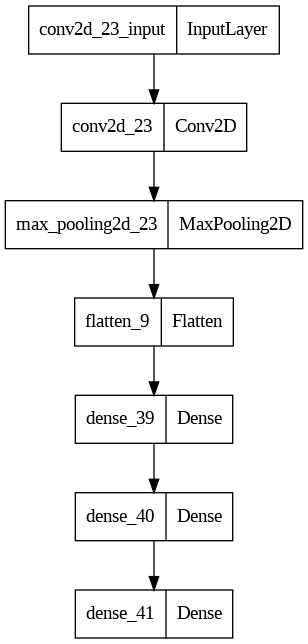

In [120]:
plot_model(model)

**Compile the model 1 with an appropriate optimizer, loss function, and evaluation metric.**
> Here the model 1 uses the `adam` as an optimizer. Here, 'adam' refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm widely used in training neural networks. Adam combines the advantages of two other popular optimization algorithms: `AdaGrad` and `RMSProp`. The loss function `categorical_crossentropy` is commonly used for multi-class classification problems (for one hot encoded target class values), where each example belongs to one of several classes. `accuracy` is taken into account for the evaluation metrics.

In [121]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Q 1.3: Train the Model:
   - Train the CNN model on the training data for a specified number of epochs.
   - Monitor the training process and evaluate the model's performance on the validation set.

In [122]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

**Train the CNN model on the training data for a specified number of epochs**

> Here the set values set for the `epochs` is `15`, `batch_size` is `64`. Earlystopping is used to make model perfomance good in case of it's ability to generalize its perfomance in the unseen data. An increase in validation loss (val_loss) after initially decreasing during training indicates that the model might be starting to overfit to the training data, hence, instead of training further to train the model we use `earlystopping` parameter to stop the model trainning after waiting for `5` (`patience=5`) more epochs to run to see the behavior of the `val_loss`.

In [123]:
# Step 5: Train the Neural Net model
history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels), callbacks=[earlystopping])

Epoch 1/15
782/782 [==============================] - 10s 10ms/step - loss: 1.4970 - accuracy: 0.4612 - val_loss: 1.2697 - val_accuracy: 0.5489
Epoch 2/15
782/782 [==============================] - 5s 6ms/step - loss: 1.1718 - accuracy: 0.5844 - val_loss: 1.2046 - val_accuracy: 0.5738
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 1.0407 - accuracy: 0.6367 - val_loss: 1.1173 - val_accuracy: 0.6072
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 0.9470 - accuracy: 0.6696 - val_loss: 1.0701 - val_accuracy: 0.6211
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.8731 - accuracy: 0.6943 - val_loss: 1.0427 - val_accuracy: 0.6349
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 0.8091 - accuracy: 0.7161 - val_loss: 1.0542 - val_accuracy: 0.6396
Epoch 7/15
782/782 [==============================] - 4s 5ms/step - loss: 0.7461 - accuracy: 0.7400 - val_loss: 1.0204 - val_accuracy: 0.6524
Epoc

**Monitor the training process and evaluate the model's performance on the validation set.**
> From the observation of the trainnig process and evaluation of the model's perfomance on the validation set, it can be observed that the validation loss (`val_loss`) is increasing from the `7th` Epoch for the few more epochs indicating that the model is trying to not really being able to generalize the validation set and may be starting to overfit. However, the model performance on the validation set can be observed to be decent till the `6th` epoch.
>
> Also it can be seen that since there is increment in the `val_loss`, the earlystopping has caused the model to stop the training process after `11th` epoch as the `patience` was set for `5` for the earlystopping along still `4` more epochs were yet left to train.

#### Q 1.4: Evaluate the Model 1:
   - Evaluate the trained model on the test data to assess its performance.
   - Compute and report the classification accuracy of the model on the test set.
   - Discuss the model performance

**Evaluate the trained model 1 on the test data to assess its performance.**
> The model 1 perfomance is `64.4%` on the test data when the respective `loss` calculated was `1.0268`.

**Compute and report the classification accuracy of the model 1 on the test set.**

In [124]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.0204 - accuracy: 0.6524
Test Accuracy: 0.652400016784668


In [125]:
predictions = model.predict(test_images[:20])
print('Predictions:', np.argmax(predictions, axis=1))
print('True Labels:', np.argmax(test_labels[:20], axis=1))

1/1 [==============================] - 0s 60ms/step
Predictions: [3 8 0 0 6 6 1 6 3 1 0 9 5 7 9 4 7 3 8 6]
True Labels: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


**Classification Report**

In [126]:
from sklearn.metrics import classification_report
predictions = model.predict(test_images)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels if they are one-hot encoded
true_classes = np.argmax(test_labels, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.62      0.80      0.69      1000
           1       0.76      0.75      0.76      1000
           2       0.55      0.50      0.52      1000
           3       0.46      0.51      0.49      1000
           4       0.55      0.66      0.60      1000
           5       0.62      0.42      0.50      1000
           6       0.79      0.68      0.73      1000
           7       0.71      0.73      0.72      1000
           8       0.81      0.72      0.76      1000
           9       0.71      0.74      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



**Plot for `loss` on training set Vs. `loss`on validation set (`val_loss`)**

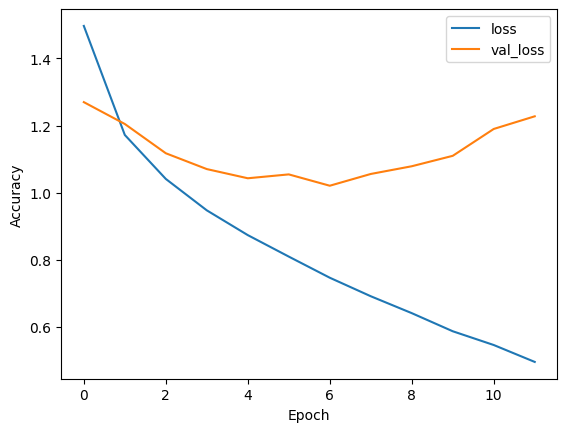

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

**Plot for `accuracy` on the trainning set Vs. `accuracy` on the validation set.**

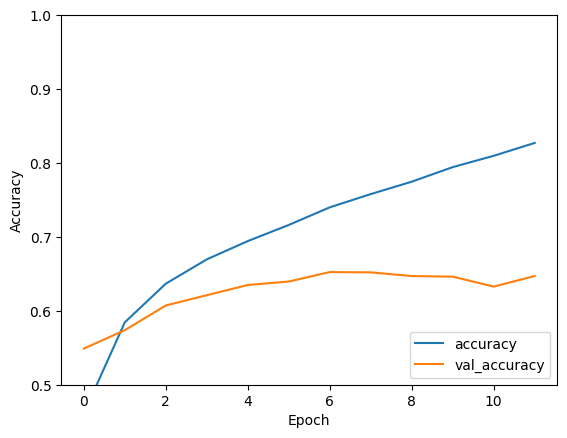

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

 **Discuss the model performance**
 - The model was able to achieve the accuracy of the `64.4%` on the testing dataset for the defined architecture,and was not overfitting. We can also observe that model accuracy being well generalized till the `6th` epoch in the `loss` Vs. `val_loss` graph. Although the accuracy was low, from the `precision` and `recall`from the classification report, it can be obsereved that the model 1 was able to generalize the classification for all the classes in a decent way.

## **Trying Different Architectures**

#### **Model 2**

**CNN architecture for Model 2 .**



In [129]:
# Step 3: Define the CNN architecture
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Model 2 Summary**

In [130]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 2, 2, 128)       

**Model 2 architecture component flow**

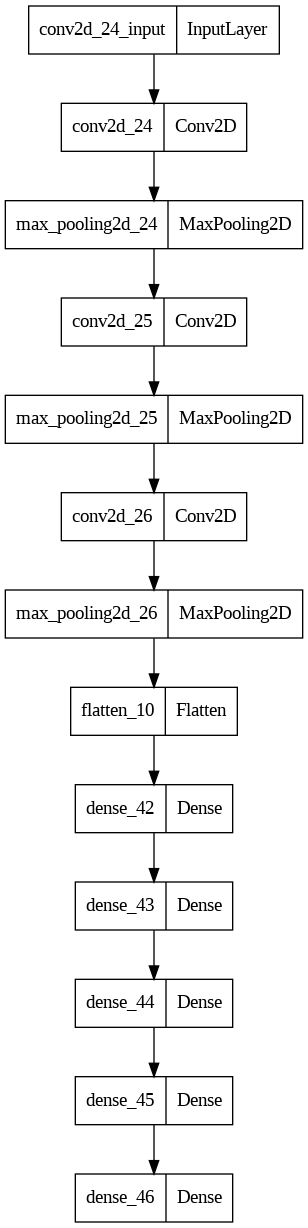

In [131]:
plot_model(model2)

**Compiling Model 2**

**Compile the model 2 with an appropriate optimizer, loss function, and evaluation metric.**
> Here the model 2 uses the `adam` as an optimizer. Here, 'adam' refers to the Adam optimizer, which is an adaptive learning rate optimization algorithm widely used in training neural networks. The loss function `categorical_crossentropy` is commonly used for multi-class classification problems (for one hot encoded target class values), where each example belongs to one of several classes. `accuracy` is taken into account for the evaluation metrics.

In [132]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [133]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

### Q 2.3: Train the Model 2:
   - Train the CNN model on the training data for a specified number of epochs.
   - Monitor the training process and evaluate the model's performance on the validation set.

**Train the CNN model on the training data for a specified number of epochs**

> Here the set values set for the `epochs` is `50`, `batch_size` is `64`. Earlystopping is used to make model perfomance good in case of it's ability to generalize its perfomance in the unseen data. An increase in validation loss (val_loss) after initially decreasing during training indicates that the model might be starting to overfit to the training data, hence, instead of training further to train the model we use `earlystopping` parameter to stop the model trainning after waiting for `5` (`patience=5`) more epochs to run to see the behavior of the `val_loss`.

In [134]:

history2 = model2.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels), callbacks=[earlystopping])


Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 1.6292 - accuracy: 0.3910 - val_loss: 1.3601 - val_accuracy: 0.4955
Epoch 2/50
782/782 [==============================] - 4s 6ms/step - loss: 1.2180 - accuracy: 0.5601 - val_loss: 1.1254 - val_accuracy: 0.6036
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.0544 - accuracy: 0.6234 - val_loss: 1.0387 - val_accuracy: 0.6302
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 0.9360 - accuracy: 0.6703 - val_loss: 0.9842 - val_accuracy: 0.6554
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 0.8516 - accuracy: 0.7003 - val_loss: 1.0953 - val_accuracy: 0.6159
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.7787 - accuracy: 0.7255 - val_loss: 0.9021 - val_accuracy: 0.6896
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 0.7110 - accuracy: 0.7503 - val_loss: 0.9201 - val_accuracy: 0.6910
Epoch 

**Monitor the training process and evaluate the model 2 performance on the validation set.**
> From the observation of the trainnig process and evaluation of the model's perfomance on the validation set, it can be observed that the validation loss (`val_loss`) is increasing from the `10th` Epoch for the few more epochs indicating that the model is trying to not really being able to generalize the validation set and may be starting to overfit. However, the model performance on the validation set can be observed to be decent till the `9th` epoch.
>
> Also it can be seen that since there is increment in the `val_loss`, the earlystopping has caused the model to stop the training process after `14th` epoch as the `patience` was set for `5` for the earlystopping along still `1` more epochs were yet left to train.

#### Q 2.4: Evaluate the Model 2:
   - Evaluate the trained model on the test data to assess its performance.
   - Compute and report the classification accuracy of the model on the test set.
   - Discuss the model performance


**Evaluate the trained model 2 on the test data to assess its performance.**
> The model 2 perfomance is `70.6%` on the test data when the respective `loss` calculated was `0.8783`.

**Compute and report the classification accuracy of the model 2 on the test set.**

In [ ]:
# Step 6: Evaluate the model
loss, accuracy = model2.evaluate(test_images, test_labels)
print('Test Accuracy:', accuracy)

In [136]:
predictions = model2.predict(test_images[:20])
print('Predictions:', np.argmax(predictions, axis=1))
print('True Labels:', np.argmax(test_labels[:20], axis=1))

1/1 [==============================] - 0s 88ms/step
Predictions: [3 8 8 0 4 6 1 6 3 9 4 9 4 7 9 8 5 3 8 6]
True Labels: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


**Classification Report**

In [137]:
from sklearn.metrics import classification_report
predictions = model2.predict(test_images)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels if they are one-hot encoded
true_classes = np.argmax(test_labels, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.79      0.87      0.83      1000
           2       0.65      0.58      0.62      1000
           3       0.57      0.36      0.44      1000
           4       0.64      0.71      0.68      1000
           5       0.54      0.69      0.61      1000
           6       0.77      0.78      0.78      1000
           7       0.76      0.72      0.74      1000
           8       0.84      0.78      0.81      1000
           9       0.80      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



**Plot for `loss` on training set Vs. `loss` on validation set**

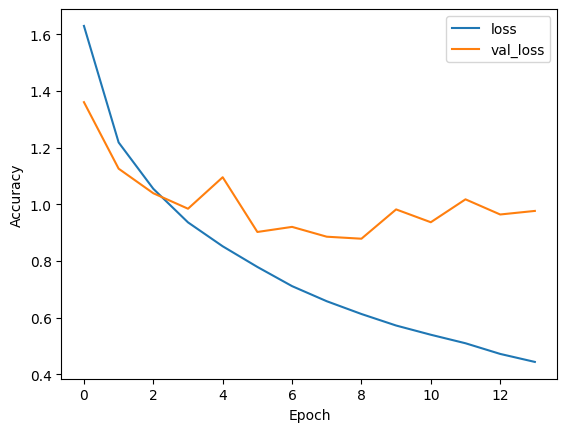

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

**Plot for `accuracy` on training set Vs. `accuracy` on validation set**

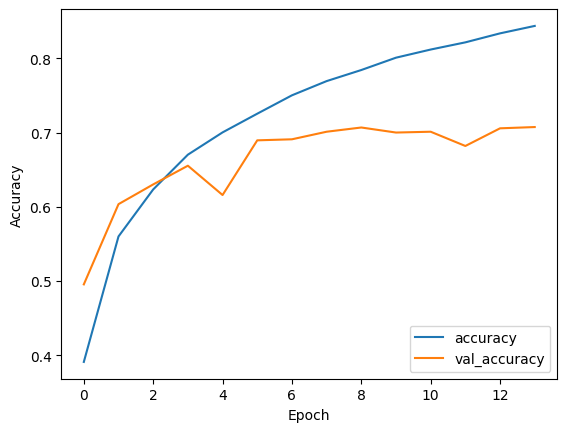

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

 **Discuss the model performance**
 - The model was able to achieve the accuracy of the `70.6%` on the testing dataset,and was not overfitting. We can also observe that model accuracy being well generalized for `9th` epoch in the `loss` Vs. `val_loss` graph. Although the accuracy was low, from the `precision` and `recall`from the classification report, it can be obsereved that the Model 2 was able to generalize the classification for all the classes in a decent way in comparison to Model 1.

#### **Model 3**

**CNN architecture for Model 3 .**

During the compilation of this architecture, `RMSprop` was used as an `optimizer` with learning rate of `0.001` was used.

In [140]:
# Step 3: Define the CNN architecture
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Model 3 Summary**

In [141]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 2, 2, 128)       

**Model 3 architecture component flow**

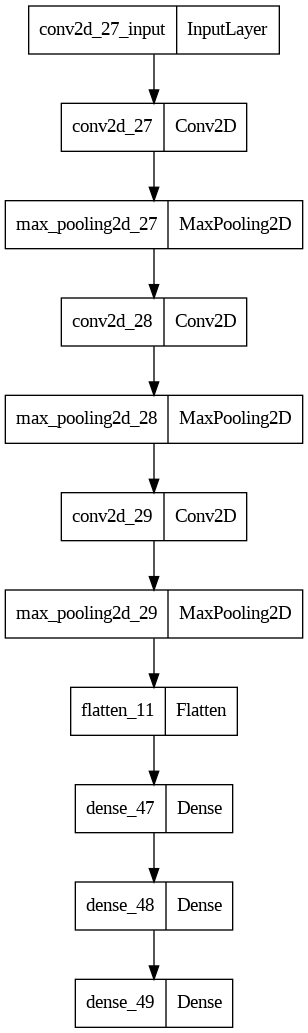

In [142]:
plot_model(model3)

**Compiling Model 3**

**Compile the model 3 with an appropriate optimizer, loss function, and evaluation metric.**
> Here the model 3 uses the `RMSprop` as an optimizer with `learning_rate` value `0.001`. The loss function `categorical_crossentropy` is commonly used for multi-class classification problems (for one hot encoded target class values), where each example belongs to one of several classes. `accuracy` is taken into account for the evaluation metrics.

In [143]:
import keras
from tensorflow.keras.optimizers import RMSprop

model3.compile(optimizer=RMSprop(learning_rate = 0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### Q 3.3: Train the Model 3:
   - Train the CNN model on the training data for a specified number of epochs.
   - Monitor the training process and evaluate the model's performance on the validation set.

In [144]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

**Train the CNN model 3 on the training data for a specified number of epochs**

> Here the set values set for the `epochs` is `50`, `batch_size` is `128`. Earlystopping is used to make model perfomance good in case of it's ability to generalize its perfomance in the unseen data. An increase in validation loss (val_loss) after initially decreasing during training indicates that the model might be starting to overfit to the training data, hence, instead of training further to train the model we use `earlystopping` parameter to stop the model trainning after waiting for `5` (`patience=5`) more epochs to run to see the behavior of the `val_loss`.

In [145]:

history3 = model3.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels), callbacks=[earlystopping])


Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 1.8261 - accuracy: 0.3312 - val_loss: 1.4488 - val_accuracy: 0.4759
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3989 - accuracy: 0.4966 - val_loss: 1.2762 - val_accuracy: 0.5398
Epoch 3/50
391/391 [==============================] - 3s 6ms/step - loss: 1.1973 - accuracy: 0.5800 - val_loss: 1.1610 - val_accuracy: 0.5960
Epoch 4/50
391/391 [==============================] - 3s 7ms/step - loss: 1.0564 - accuracy: 0.6297 - val_loss: 1.0876 - val_accuracy: 0.6205
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9474 - accuracy: 0.6694 - val_loss: 0.9828 - val_accuracy: 0.6569
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.8526 - accuracy: 0.7022 - val_loss: 0.9110 - val_accuracy: 0.6838
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.7775 - accuracy: 0.7290 - val_loss: 0.9564 - val_accuracy: 0.6745
Epoch 

**Monitor the training process and evaluate the model 3 performance on the validation set.**
> From the observation of the trainnig process and evaluation of the model's perfomance on the validation set, it can be observed that the validation loss (`val_loss`) is increasing from the `9th` Epoch for the few more epochs indicating that the model is trying to not really being able to generalize the validation set and may be starting to overfit. However, the model performance on the validation set can be observed to be decent till the `8th` epoch.
>
> Also it can be seen that since there is increment in the `val_loss`, the earlystopping has caused the model to stop the training process after `13th` epoch as the `patience` was set for `5` for the earlystopping along still `2` more epochs were yet left to train.

### Q 3.4: Evaluate the Model 3:
   - Evaluate the trained model 3 on the test data to assess its performance.
   - Compute and report the classification accuracy of the model on the test set.
   - Discuss the model performance
     

**Evaluate the trained model 3 on the test data to assess its performance.**
> The model 3 perfomance is `70.02%` on the test data when the respective `loss` calculated was `0.8778`.

**Compute and report the classification accuracy of the model 3 on the test set.**

In [146]:
# Step 6: Evaluate the model
loss, accuracy = model3.evaluate(test_images, test_labels)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.8778 - accuracy: 0.7022
Test Accuracy: 0.7021999955177307


In [147]:
predictions = model3.predict(test_images[:20])
print('Predictions:', np.argmax(predictions, axis=1))
print('True Labels:', np.argmax(test_labels[:20], axis=1))

1/1 [==============================] - 0s 74ms/step
Predictions: [3 8 8 0 4 6 9 6 3 1 0 9 5 7 9 8 5 7 9 6]
True Labels: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


**Classification Report**

In [148]:
from sklearn.metrics import classification_report
predictions = model3.predict(test_images)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels if they are one-hot encoded
true_classes = np.argmax(test_labels, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.76      0.73      1000
           1       0.85      0.79      0.82      1000
           2       0.51      0.73      0.60      1000
           3       0.59      0.46      0.52      1000
           4       0.72      0.56      0.63      1000
           5       0.71      0.52      0.60      1000
           6       0.77      0.80      0.78      1000
           7       0.79      0.73      0.76      1000
           8       0.75      0.86      0.80      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



**Plot for `loss` on training set Vs. `loss` on validation set**

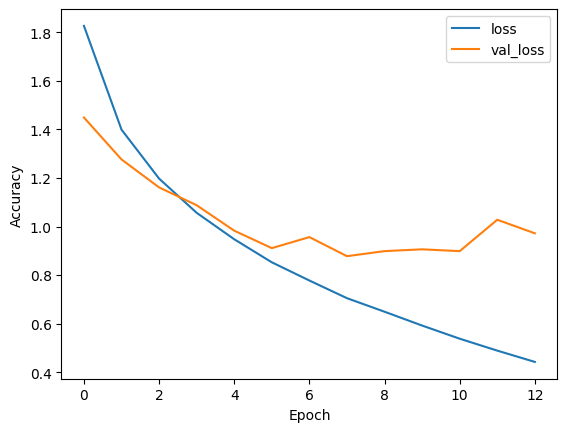

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

**Plot for `accuracy` on training set Vs. `accuracy` on validation set**

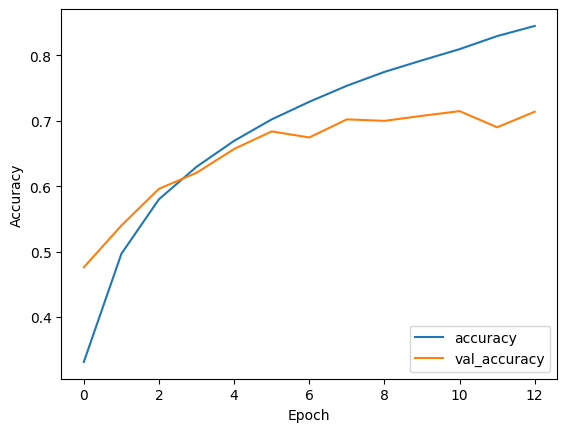

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

 **Discuss the model performance**
 - The model 3 was able to achieve the accuracy of the `70.02%` on the testing dataset for the defined architecture when used RMSprop with learning_rate of `0.001`,and was not overfitting. We can also observe that model accuracy being well generalized for `8th` epoch in the `loss` Vs. `val_loss` graph. The model 3 was able to perfom better than model 1 but not as better as model 2. Although the accuracy was low, from the `precision` and `recall`from the classification report, it can be obsereved that the Model 3 was able to generalize the classification for all the classes in a decent way in comparison to Model 1 .

<div class="alert alert-block alert-info">

# Part 2: Reflection

</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity.
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells.

**1. A reflection of your experience performing the activity**

> This activity provided the experience on the working principles of the Convolutional Neural Network models, and their architectures. I experinced hands on opportunity to try difference architectures of the CNN and observe their  impacts on the model accuracy. The experinece on CNN allowed me to learn about the concepts of the `convultional layers`, `pooling layers`, `filters`, and diverse types of `activation` function as well as `optimizers`. 

**2. A reflection on the importance of learning this activity.**

> This activity helped me to learn about the need of reshaping the data to the proper format to fit to the model. I was also able to learn the significance of the `EarlyStopping` parameter on how it stops the model to be  overfit and be well generalized. Moreover, I also understood the concept of the `validation loss` during the model training, and as well as different types of optimization functions such as `adam` and `RMSprop`.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab7.ipynb** to the **Lab 7 - Classification Using Convolutional Neural Networks (Dropbox)** on D2L by the due date.

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
